In [0]:
# united 2 build working file 

# we will move the nice completed file to 'unit_2_production' when finished
#   this will allow me to fancy it up.  

In [0]:
# import my main squeezes
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

In [0]:
plt.rcParams['figure.dpi'] = 150


In [4]:
!pip install category_encoders==2.*
!pip install pandas-profiling==2.*

In [0]:
# import the dataset - lets establish some baselines 
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR6LzWx6lS1FOS0Fl2QFF1CJeNrhsH0MxLmqEp8vbYj0Z-zDRm5Xwu4PQkP9WbCSokITS4UwcF9hCQ3/pub?output=csv')


In [0]:
# for dealing with all the ugly column names. 
df.columns = (
    df.columns
    .str.replace(' - ', '_')
    .str.replace('/', '_')
    .str.replace(',', '_')
    .str.replace('.', '_')
    .str.replace('(', '_')
    .str.replace(')', '_')
    .str.replace(' ', '_')
    .str.replace('__', '_')
    .str.lower()
)

In [7]:
print(df.shape)
df.head()

(576, 21)


city               country  ...  movie_ticket  apples_1kg_
0     Aachen               Germany  ...          8.93         2.05
1    Aalborg               Denmark  ...         14.99         2.29
2   Aberdeen        United Kingdom  ...         13.11         2.79
3  Abu Dhabi  United Arab Emirates  ...          9.53         2.35
4      Accra                 Ghana  ...          7.33         2.88

[5 rows x 21 columns]

In [8]:
# Count the mssing values
df.isna().sum().sort_values()

city                                0
apartment_utilities                 0
transit_ticket                      0
water_1_5_liter_bottle_             0
eggs_12_                            0
water_0_33_liter_bottle_            0
cappuccino_regular_                 0
internet_monthly                    0
movie_ticket                        0
apartment_city_center_1bed          0
milk_regular_1_liter_               0
local_purchasing_power_index        0
restaurant_price_index              0
groceries_index                     0
cost_of_living_plus_rent            0
rent_index                          0
cost_of_living_index                0
country                             0
monthly_pass                        0
apples_1kg_                         0
domestic_beer_0_5_liter_bottle_    13
dtype: int64

In [9]:
df.dtypes

city                                object
country                             object
cost_of_living_index               float64
rent_index                         float64
cost_of_living_plus_rent           float64
groceries_index                    float64
restaurant_price_index             float64
local_purchasing_power_index       float64
milk_regular_1_liter_              float64
monthly_pass                       float64
apartment_city_center_1bed         float64
internet_monthly                   float64
cappuccino_regular_                float64
water_0_33_liter_bottle_           float64
eggs_12_                           float64
water_1_5_liter_bottle_            float64
domestic_beer_0_5_liter_bottle_    float64
transit_ticket                     float64
apartment_utilities                float64
movie_ticket                       float64
apples_1kg_                        float64
dtype: object

In [10]:
# Pandas Profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True).to_notebook_iframe()

profile

# Baseline Accuracy

In [11]:
df['cost_of_living_index'].describe()

count    576.000000
mean      61.625069
std       21.551263
min       19.550000
25%       42.472500
50%       66.850000
75%       75.617500
max      136.660000
Name: cost_of_living_index, dtype: float64

In [12]:
#This is the cost of living mae for the entire dataset together 
guess = df['cost_of_living_index'].mean()
error = guess - df['cost_of_living_index']
mean_absolute_error = error.abs().mean()
# repeat it back in a clearer format 
print(f'Guessed : {guess:,.2f} for every city ')
print(f'Our cost of living index would be off by {mean_absolute_error:,.2f} on average.')

Guessed : 61.63 for every city 
Our cost of living index would be off by 17.86 on average.


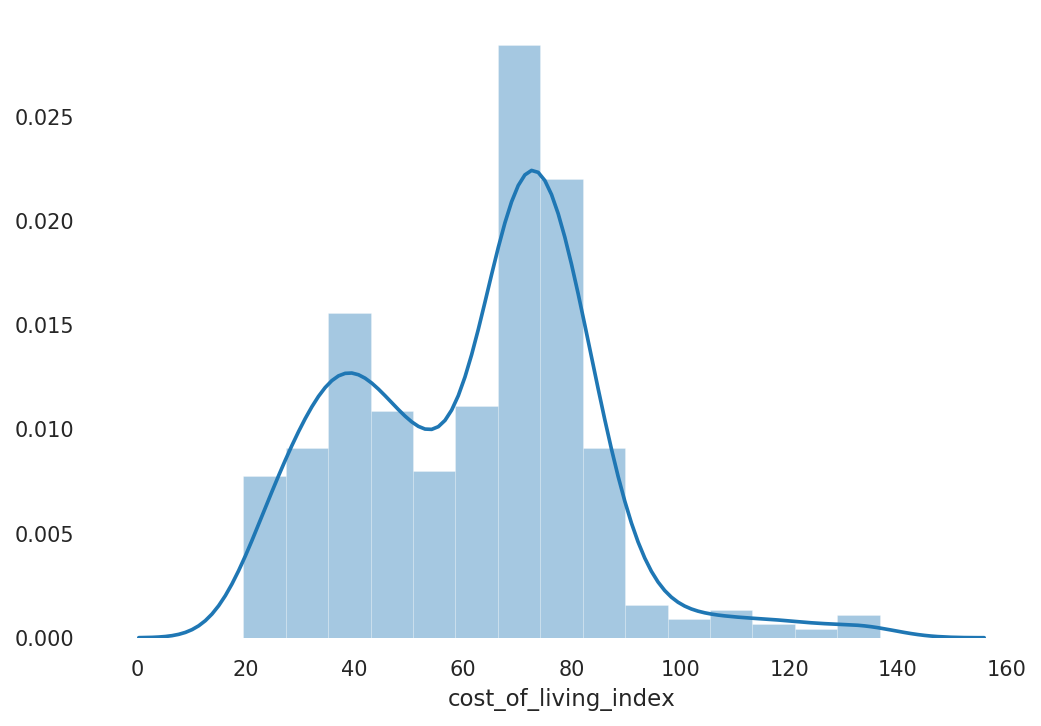

In [13]:
# The distribution is right-skewed double humped
sns.distplot(df['cost_of_living_index']);

# Train Test Split

In [14]:
# from sklearn.model_selection import train_test_split I ended up not using this


"""
The following is an example of what the sklearn approach would be
# train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
#                  pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
# test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')

# # Split train into train & val
# train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
#                               stratify=train['status_group'], random_state=42)

# sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')


# train.shape, val.shape, test.shape

"""

# split is the np function that train test split uses and split function 
# is easier for me to understand 


"\nThe following is an example of what the sklearn approach would be\n# train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), \n#                  pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))\n# test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')\n\n# # Split train into train & val\n# train, val = train_test_split(train, train_size=0.80, test_size=0.20, \n#                               stratify=train['status_group'], random_state=42)\n\n# sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')\n\n\n# train.shape, val.shape, test.shape\n\n"

In [0]:
# make a train test val split 
# 80% 10% 10%
train, val, test = np.split(df.sample(frac=1, random_state=42), [int(.8*len(df)), int(.9*len(df))])

In [16]:
print(train.shape)
print(val.shape)
print(test.shape)

(460, 21)
(58, 21)
(58, 21)


In [17]:
#This is the cost of living mae for the train dataset alone now
train_guess = train['cost_of_living_index'].mean()
train_error = train_guess - train['cost_of_living_index']
train_mean_absolute_error = train_error.abs().mean()
# repeat it back in a clearer format 
print(f'*Training Set* Guessed : {train_guess:,.2f} for every city ')
print(f'Our cost of living index would be off by {train_mean_absolute_error:,.2f} on average. *Training Set*')

*Training Set* Guessed : 61.68 for every city 
Our cost of living index would be off by 18.40 on average. *Training Set*


# Wrangle Function and Feature engineering

In [18]:
df.columns

Index(['city', 'country', 'cost_of_living_index', 'rent_index',
       'cost_of_living_plus_rent', 'groceries_index', 'restaurant_price_index',
       'local_purchasing_power_index', 'milk_regular_1_liter_', 'monthly_pass',
       'apartment_city_center_1bed', 'internet_monthly', 'cappuccino_regular_',
       'water_0_33_liter_bottle_', 'eggs_12_', 'water_1_5_liter_bottle_',
       'domestic_beer_0_5_liter_bottle_', 'transit_ticket',
       'apartment_utilities', 'movie_ticket', 'apples_1kg_'],
      dtype='object')

In [19]:
train['domestic_beer_0_5_liter_bottle_'].describe()

count    449.000000
mean       1.637639
std        0.859355
min        0.440000
25%        1.000000
50%        1.490000
75%        2.010000
max        7.230000
Name: domestic_beer_0_5_liter_bottle_, dtype: float64

In [0]:
def clean(X):

    # Prevent SettingWithCopyWarning
    X = X.copy()

    X = X.drop(columns='cost_of_living_plus_rent')
    # drop the column that will leak data into the model 

    # some country don't allow alcohol deal with the nannies and zeroes 
    cols_with_zeros = ['domestic_beer_0_5_liter_bottle_']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col+'_MISSING'] = X[col].isnull()

    X.fillna(X.mean(), inplace=True)
    
    return X

train = clean(train)
val = clean(val)
test = clean(test)  

In [21]:
# mean_beer = X[X['domestic_beer_0_5_liter_bottle_']>0]['domestic_beer_0_5_liter_bottle_'].mean()
#     X.loc[X['domestic_beer_0_5_liter_bottle_']==0, 'domestic_beer_0_5_liter_bottle_'] = int(mean_beer)


train['domestic_beer_0_5_liter_bottle_'].describe()

count    460.000000
mean       1.637639
std        0.848995
min        0.440000
25%        1.000000
50%        1.500000
75%        2.000000
max        7.230000
Name: domestic_beer_0_5_liter_bottle_, dtype: float64

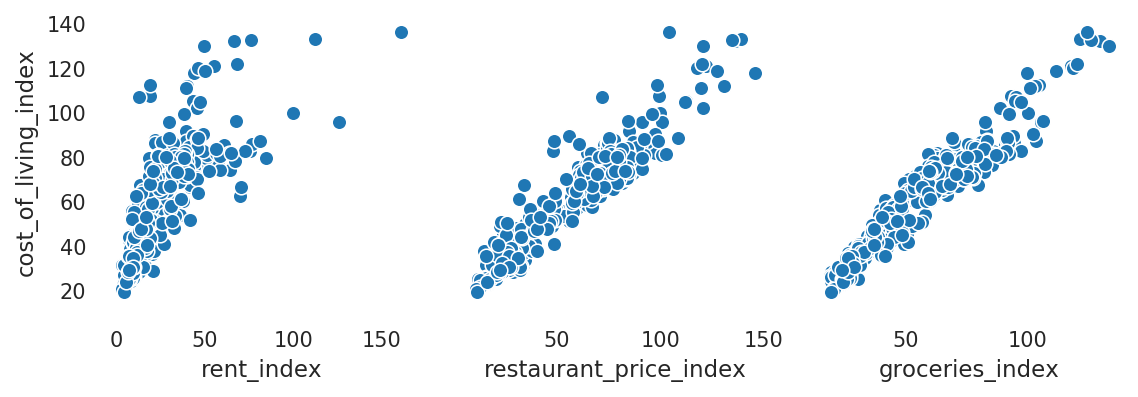

In [22]:
# Seaborn pairplot to show relationship of the data to my variables

# pp = sns.pairplot(data=data,
#                   y_vars=['age'],
#                   x_vars=['weight', 'height', 'happiness'])

# cost_of_living_plus_rent restaurant_price_index

# apartment_city_center_1bed apartment_utilities internet_monthly groceries_index

pairplot = sns.pairplot(data=train,
                        y_vars=['cost_of_living_index'],
                        x_vars= ['rent_index', 'restaurant_price_index', 'groceries_index'])

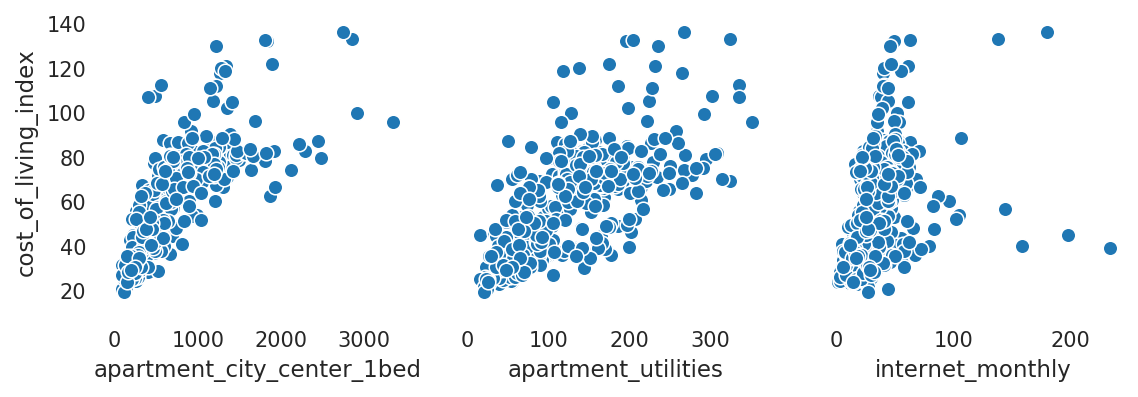

In [23]:
pairplot = sns.pairplot(data=train,
                        y_vars=['cost_of_living_index'],
                        x_vars= ['apartment_city_center_1bed', 'apartment_utilities', 'internet_monthly'])

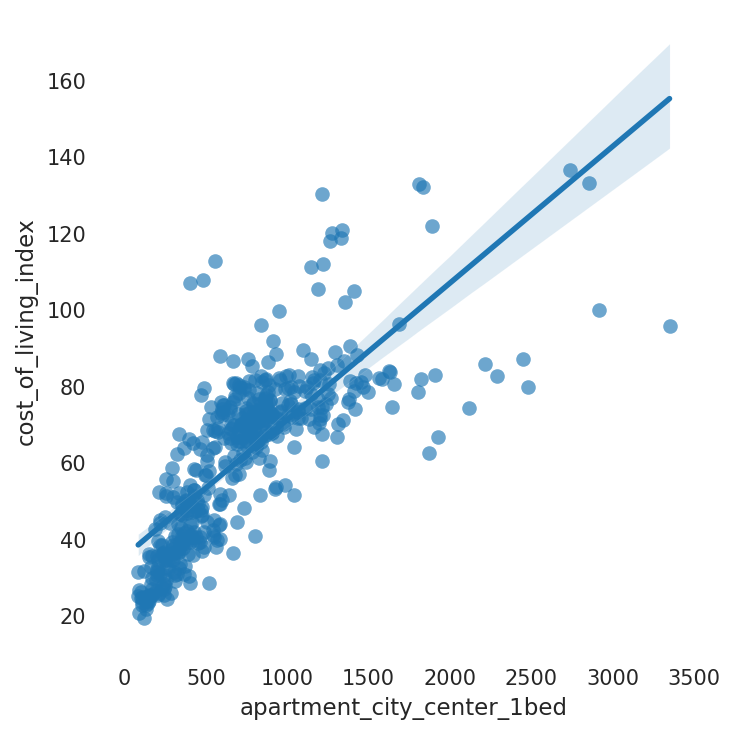

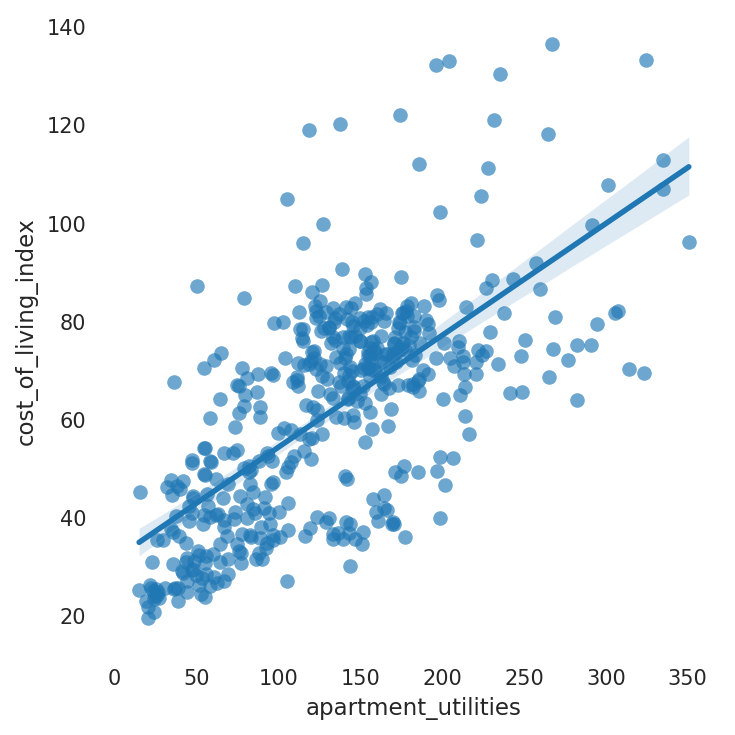

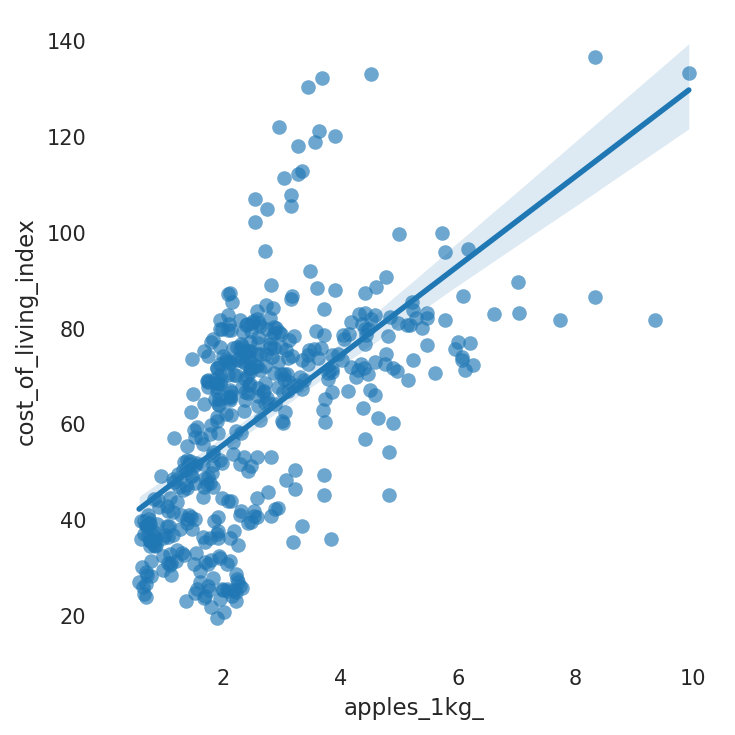

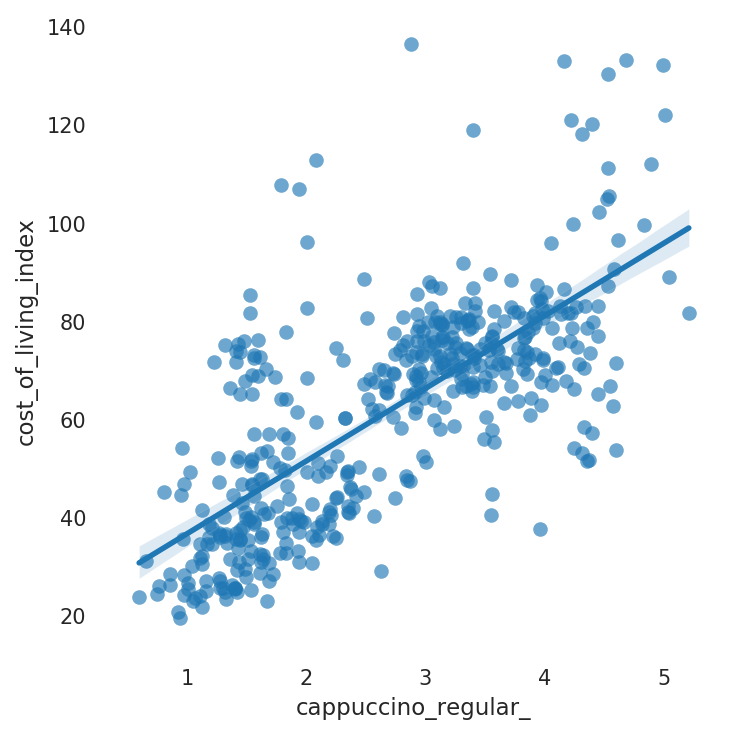

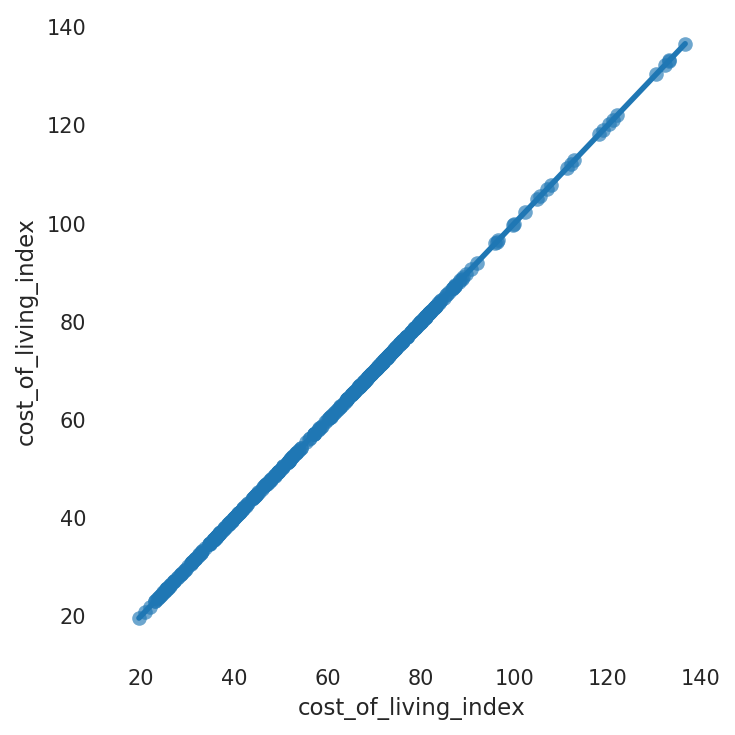

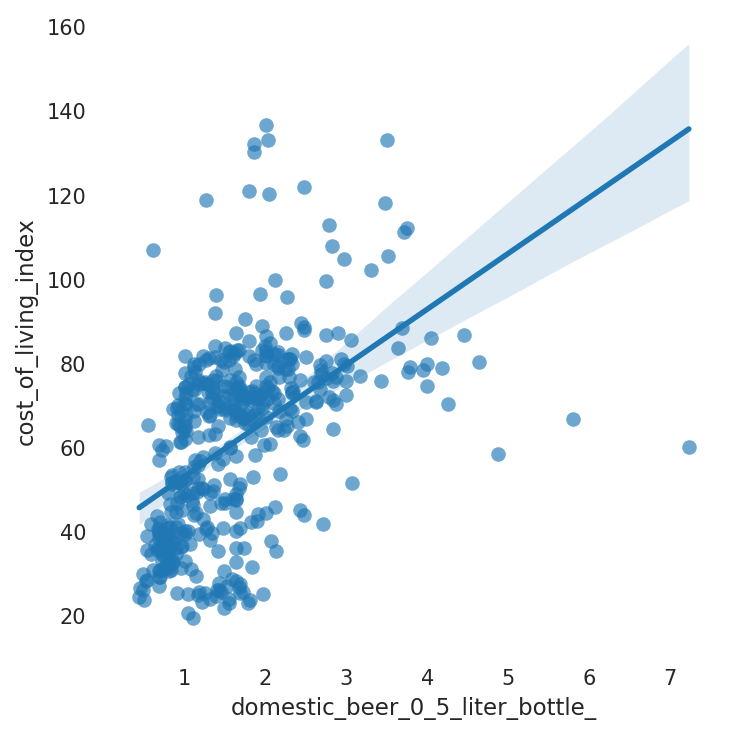

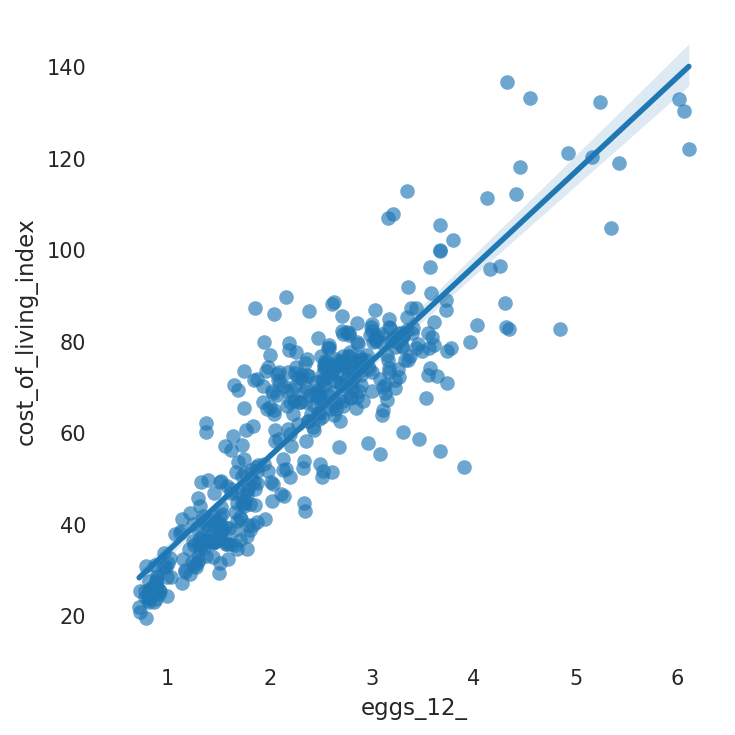

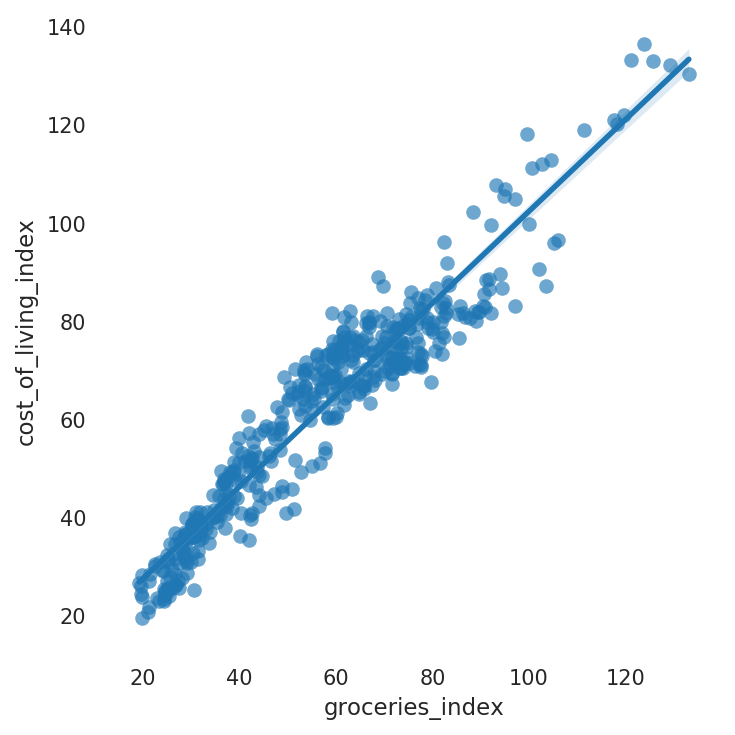

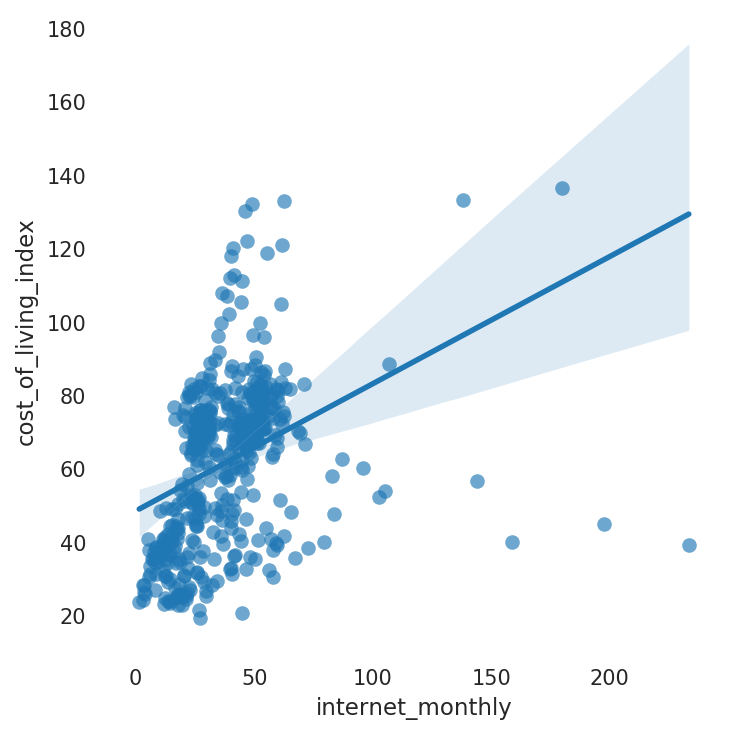

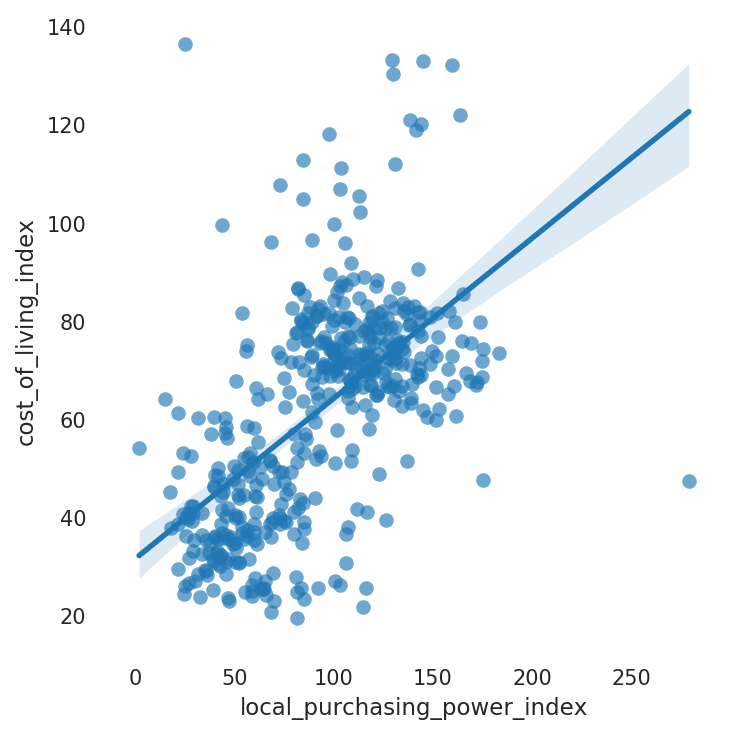

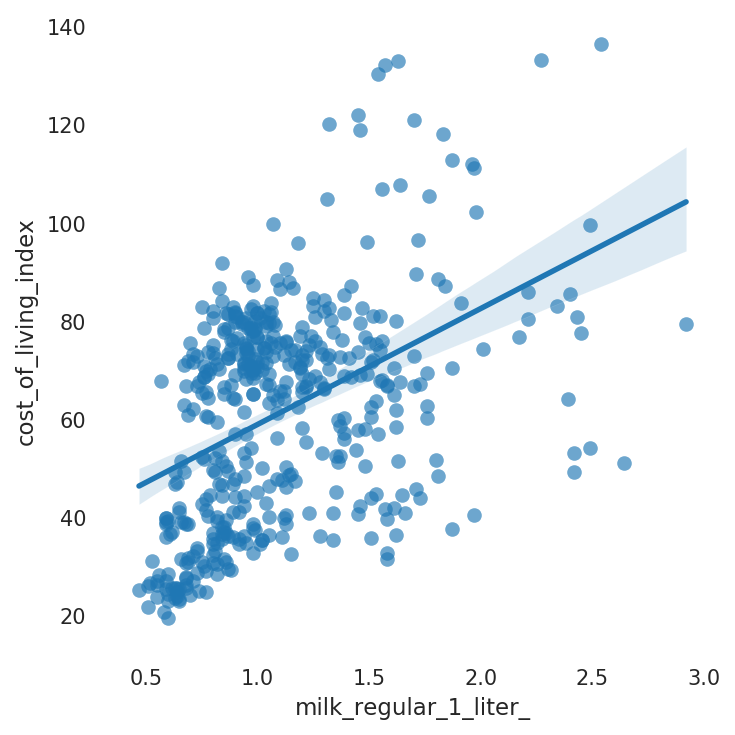

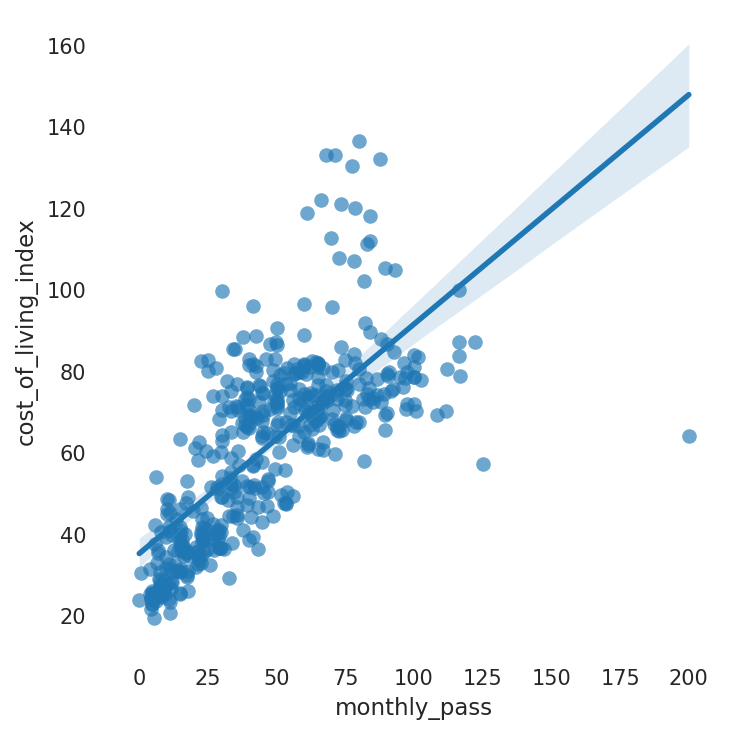

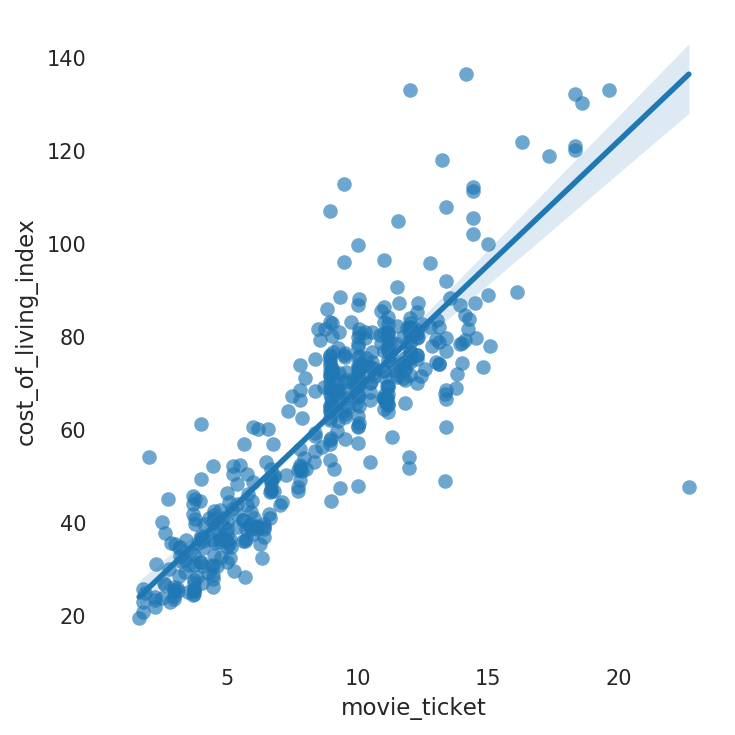

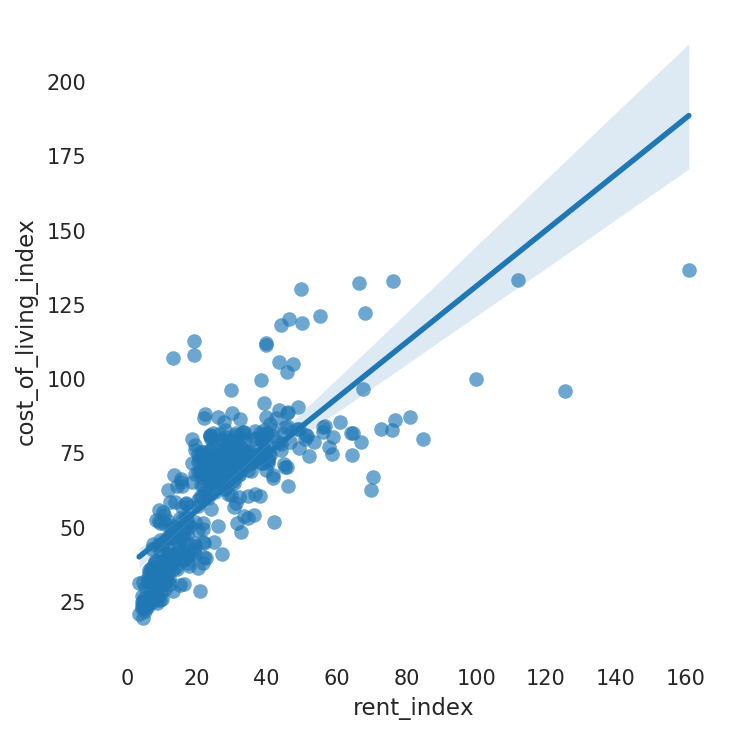

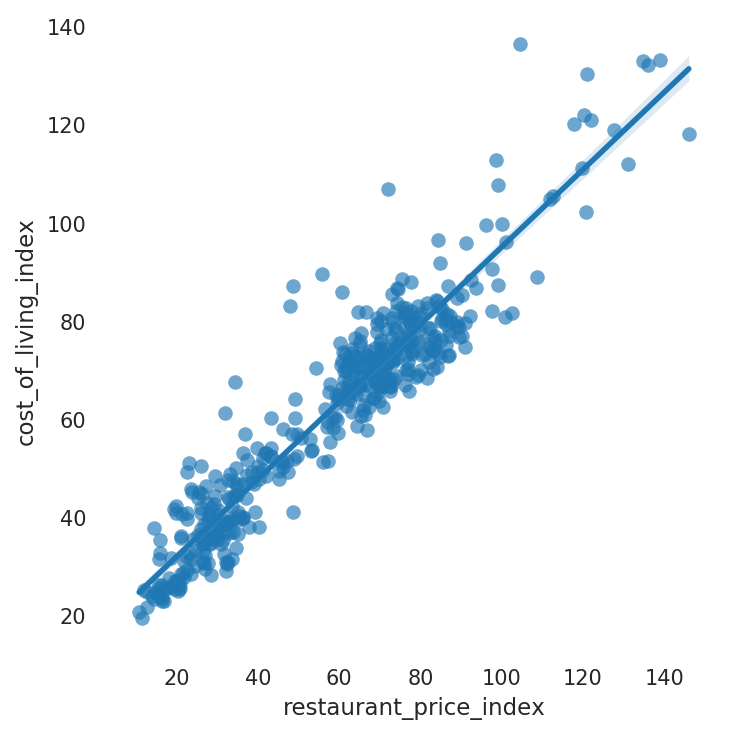

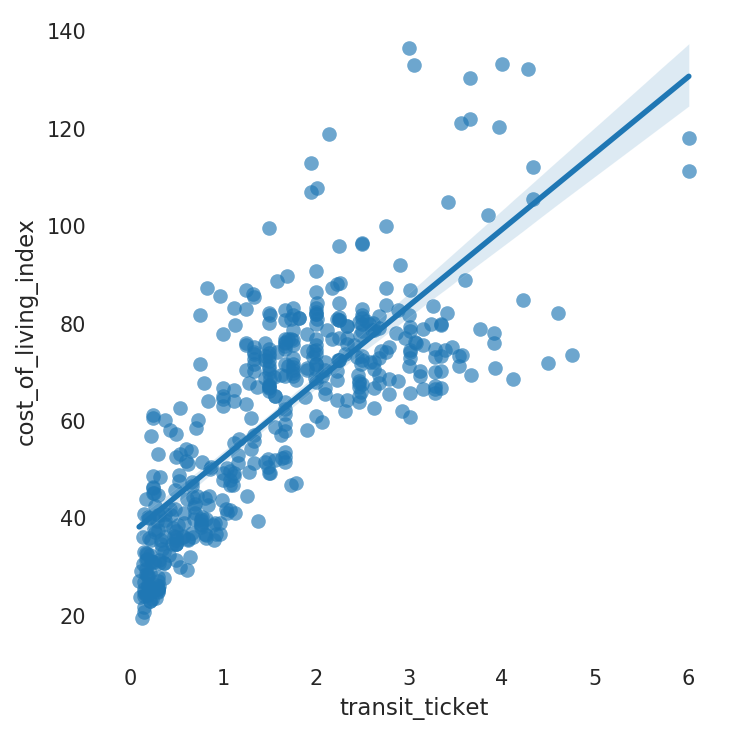

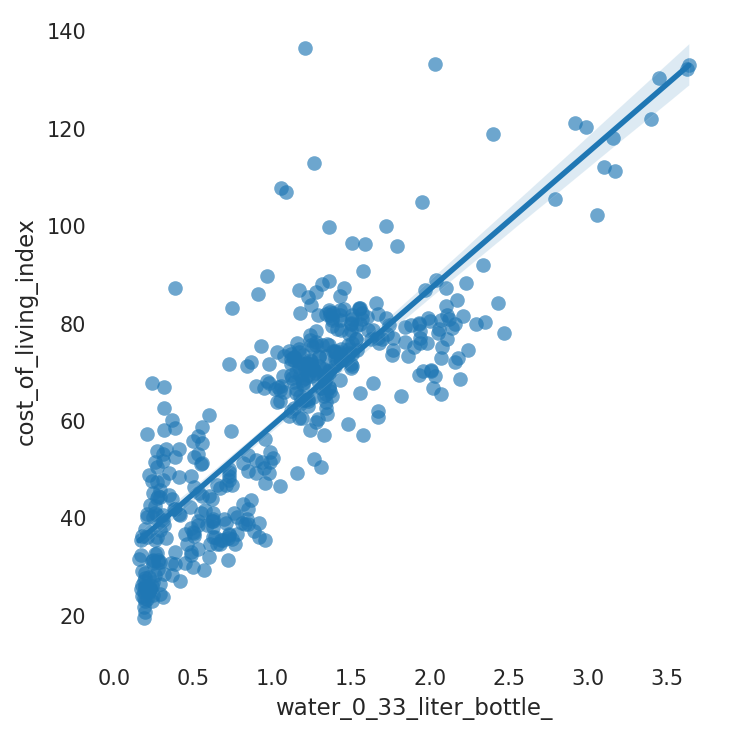

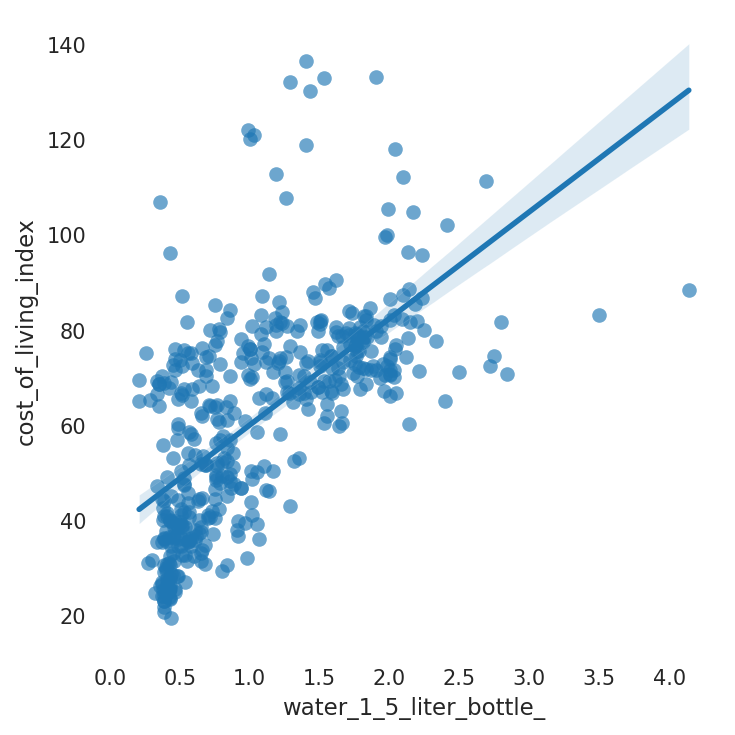

In [24]:
numeric = train.select_dtypes('number')
for col in sorted(numeric.columns):
    sns.lmplot(x=col, y='cost_of_living_index', data=train, scatter_kws=dict(alpha=0.65))
    plt.show()

# !!! Save Space for doing Cross Validation here !!!

In [0]:
# put my cross validation code here

# Target / Features X train - y feature matrix

In [0]:
# The COL Index is the target
target = 'cost_of_living_index'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 60
# increased to 60 for this exercise 
categorical_features = cardinality[cardinality <= 60].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [0]:
# Arrange data into X features matrix and y target vector 

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [28]:
print(X_train.shape)
X_train.head()

(460, 18)


rent_index  ...  domestic_beer_0_5_liter_bottle__MISSING
234        5.85  ...                                    False
118       56.68  ...                                    False
346       23.77  ...                                    False
498        4.42  ...                                    False
402        9.53  ...                                    False

[5 rows x 18 columns]

# Working pipe here - This is using all the features

In [0]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import warnings
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [0]:
#instantiate scaler to standardize values 
# apply to train test val 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [33]:
type(X_train_scaled)

numpy.ndarray

In [0]:
# X_train_scaled_df = pd.DataFrame(X_train_scaled)
# X_train_scaled_df
# sns.distplot(X_train_scaled_df['cost_of_living_index'])

In [0]:
# X_test_scaled_df = pd.DataFrame(X_test_scaled)
# X_test_scaled_df
# sns.distplot(X_test_scaled_df['cost_of_living_index']);

In [36]:
# loop through all the options of k best from 1 to size of length of columns
for k in range(1, len(X_train.columns)+1):
    print(f'{k} features')
    
    #instantiate selector
    selector = SelectKBest(score_func=f_regression, k=k)
    #Fit train set
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    # apply fit to the validation and test 
    X_val_selected = selector.transform(X_val_scaled)
    X_test_selected = selector.transform(X_test_scaled)
    
    #instantiate the model / fit the model 
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    
    # apply the model to the validation set 
    y_pred = model.predict(X_val_selected)
    mae = mean_absolute_error(y_val, y_pred)
    print(f'MAE:  versus my validation set  {mae:,.4f} \n')

1 features
MAE:  versus my validation set  5.6619 

2 features
MAE:  versus my validation set  2.7563 

3 features
MAE:  versus my validation set  2.7240 

4 features
MAE:  versus my validation set  2.6075 

5 features
MAE:  versus my validation set  2.6451 

6 features
MAE:  versus my validation set  2.6119 

7 features
MAE:  versus my validation set  2.6989 

8 features
MAE:  versus my validation set  2.7115 

9 features
MAE:  versus my validation set  2.4921 

10 features
MAE:  versus my validation set  2.3937 

11 features
MAE:  versus my validation set  1.9763 

12 features
MAE:  versus my validation set  1.8328 

13 features
MAE:  versus my validation set  1.7739 

14 features
MAE:  versus my validation set  1.6633 

15 features
MAE:  versus my validation set  1.6388 

16 features
MAE:  versus my validation set  1.5293 

17 features
MAE:  versus my validation set  1.4655 

18 features
MAE:  versus my validation set  1.4676 



# K Best versus test set



In [37]:
# loop through all the options of k best from 1 to size of length of columns
for k in range(1, len(X_train.columns)+1):
    print(f'{k} features')
    
    #instantiate selector
    selector = SelectKBest(score_func=f_regression, k=k)
    #Fit train set
    X_train_selected = selector.fit_transform(X_train_scaled, y_train)
    # apply fit to the validation and test 
    X_val_selected = selector.transform(X_val_scaled)
    X_test_selected = selector.transform(X_test_scaled)
    
    #instantiate the model / fit the model 
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    
    # apply the model to the validation set 
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_val, y_pred)
    print(f'MAE:  versus my test set  {mae:,.4f} \n')

1 features
MAE:  versus my test set  21.2985 

2 features
MAE:  versus my test set  19.9288 

3 features
MAE:  versus my test set  19.9571 

4 features
MAE:  versus my test set  20.0284 

5 features
MAE:  versus my test set  20.0206 

6 features
MAE:  versus my test set  20.0493 

7 features
MAE:  versus my test set  20.0625 

8 features
MAE:  versus my test set  20.0156 

9 features
MAE:  versus my test set  19.9577 

10 features
MAE:  versus my test set  19.8186 

11 features
MAE:  versus my test set  19.9570 

12 features
MAE:  versus my test set  19.9478 

13 features
MAE:  versus my test set  19.8940 

14 features
MAE:  versus my test set  19.9018 

15 features
MAE:  versus my test set  19.8562 

16 features
MAE:  versus my test set  19.9202 

17 features
MAE:  versus my test set  19.9580 

18 features
MAE:  versus my test set  19.9596 



# All Regressors versus test and val with images


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) -Classifer 

[43.08374261 64.79108274 39.11679198 77.60431191 64.02218602 64.42737964
 72.85169873 73.15985334 60.00800831 46.51985963 72.36902061 71.11991497
 74.97586088 32.85937838 59.84628582 46.29346208 68.9628073  29.49902273
 47.75648579 43.53940366 70.69290931 32.91011529 35.73919333 74.4874494
 76.20899666 75.12088571 42.88352012 79.50843847 53.84955692 78.45553145
 68.94615461 67.85420916 39.94117366 68.53221919 68.1824941  63.33609299
 39.81280826 71.15036119 70.9720213  32.16886702 54.3712028  67.02354001
 52.31386278 71.1074522  77.65043031 71.84293864 40.97619298 68.53925788
 72.83517654 28.85311767 43.21151936 69.95706166 76.61835531 66.5534444
 35.83648527 28.87747766 38.29159889 35.38402913] 

MAE:  versus my test set18.4696 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.

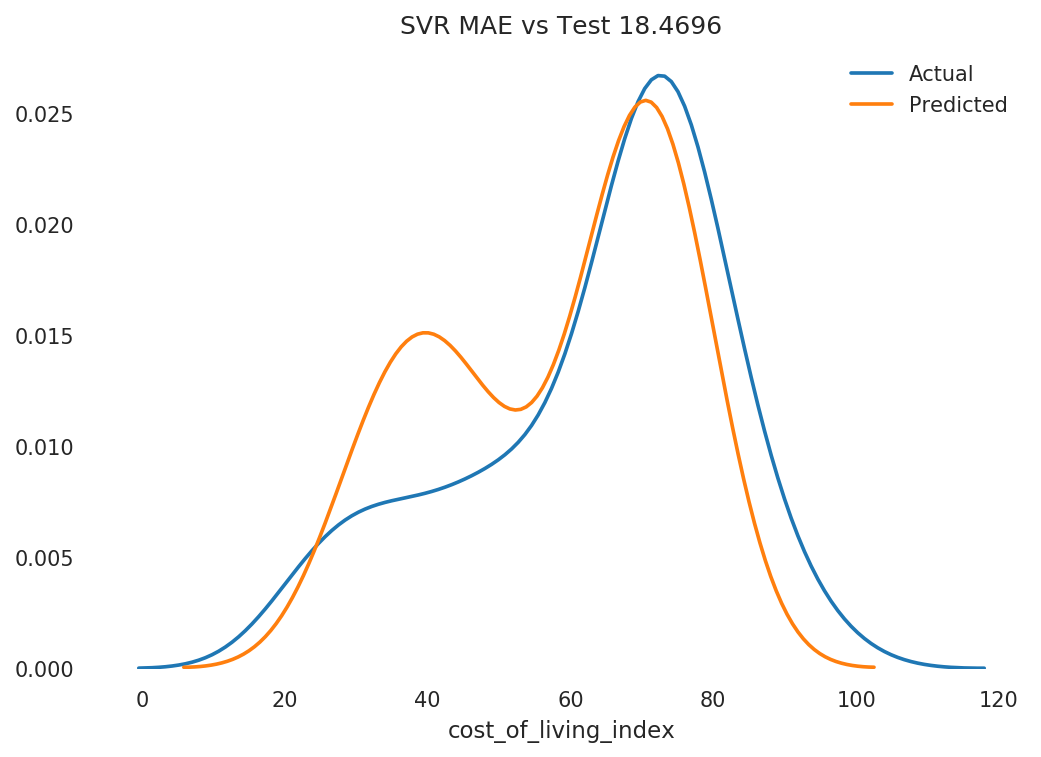

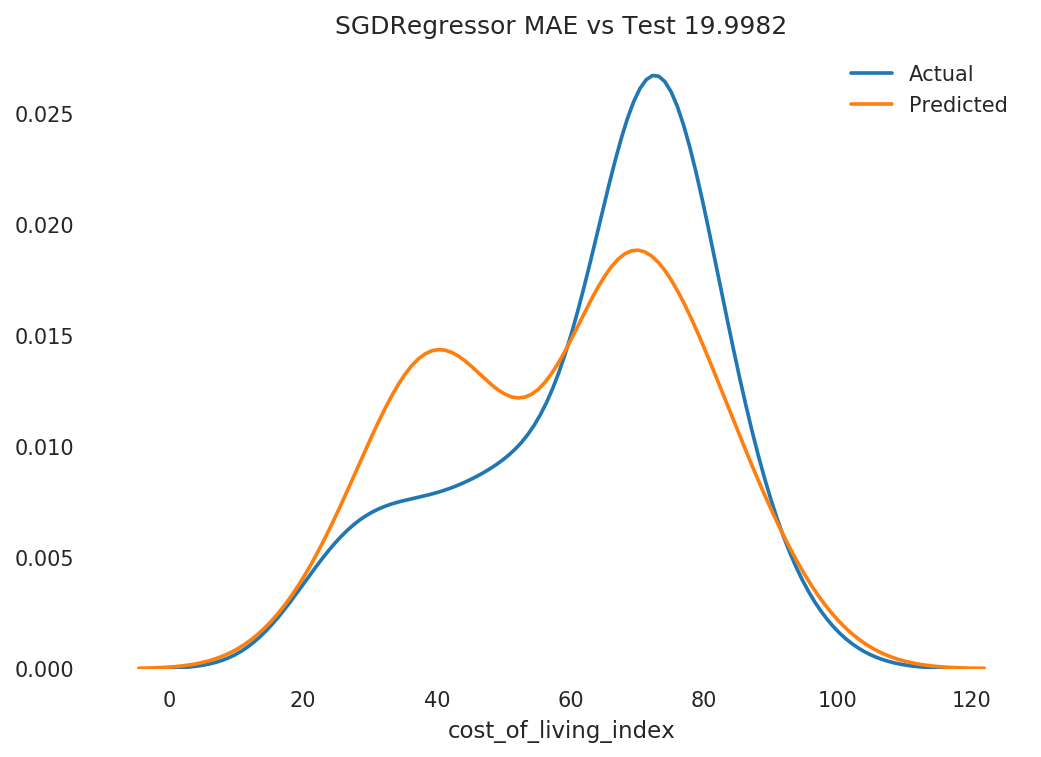

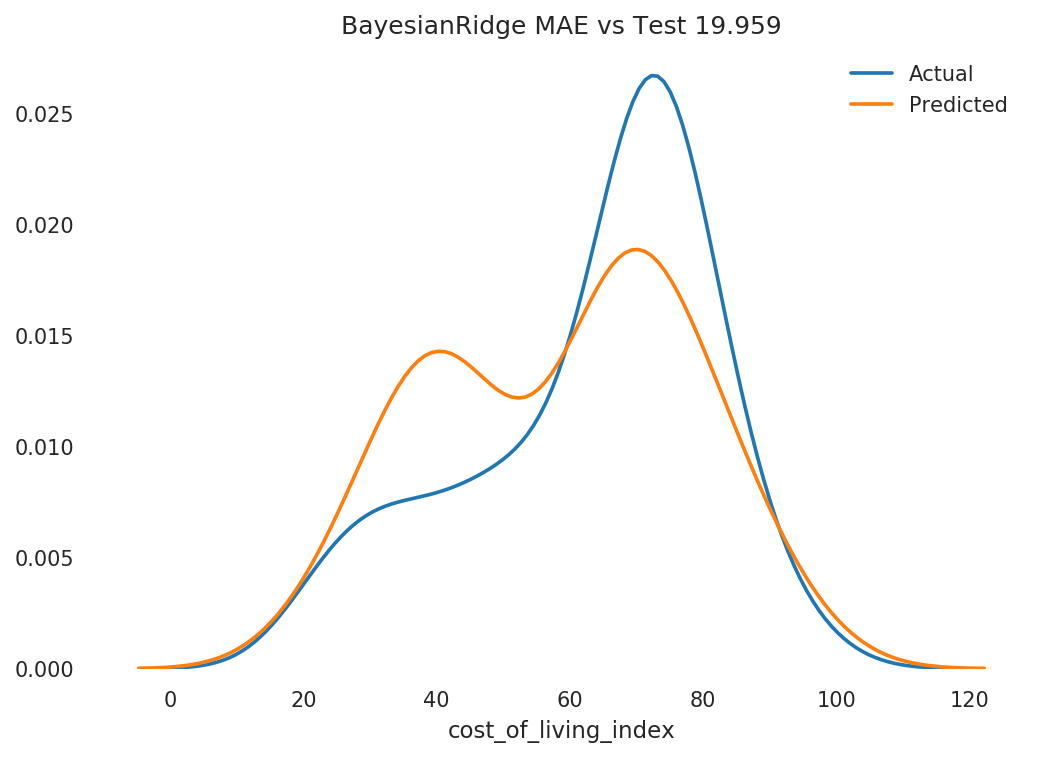

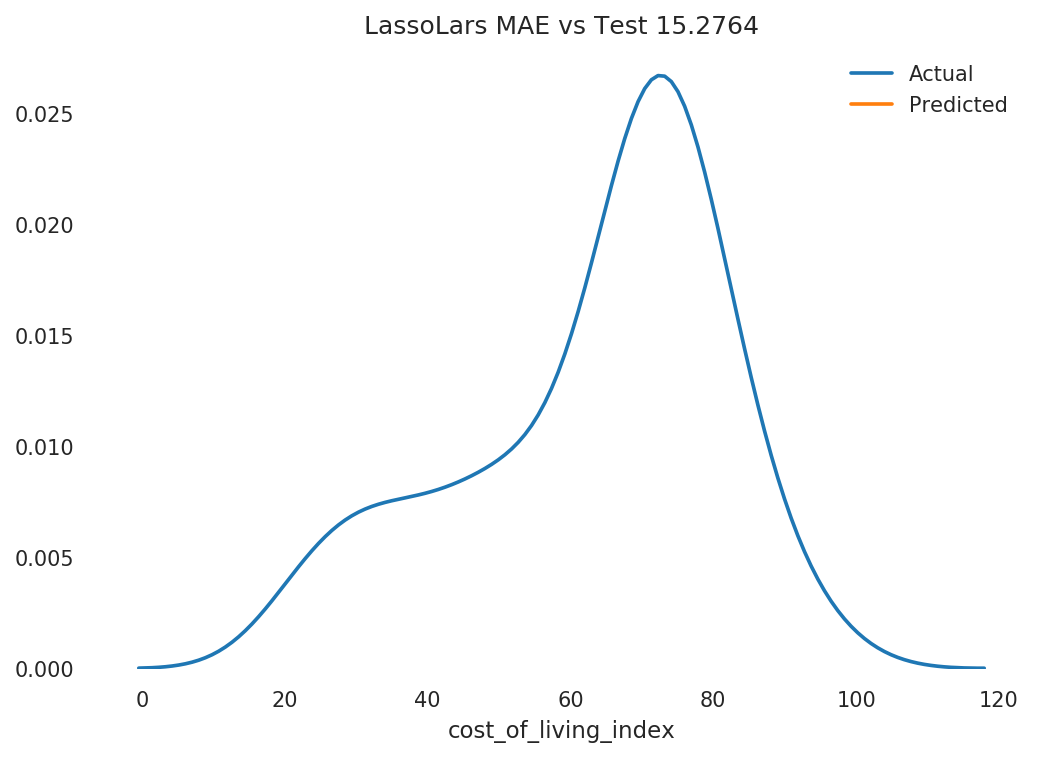

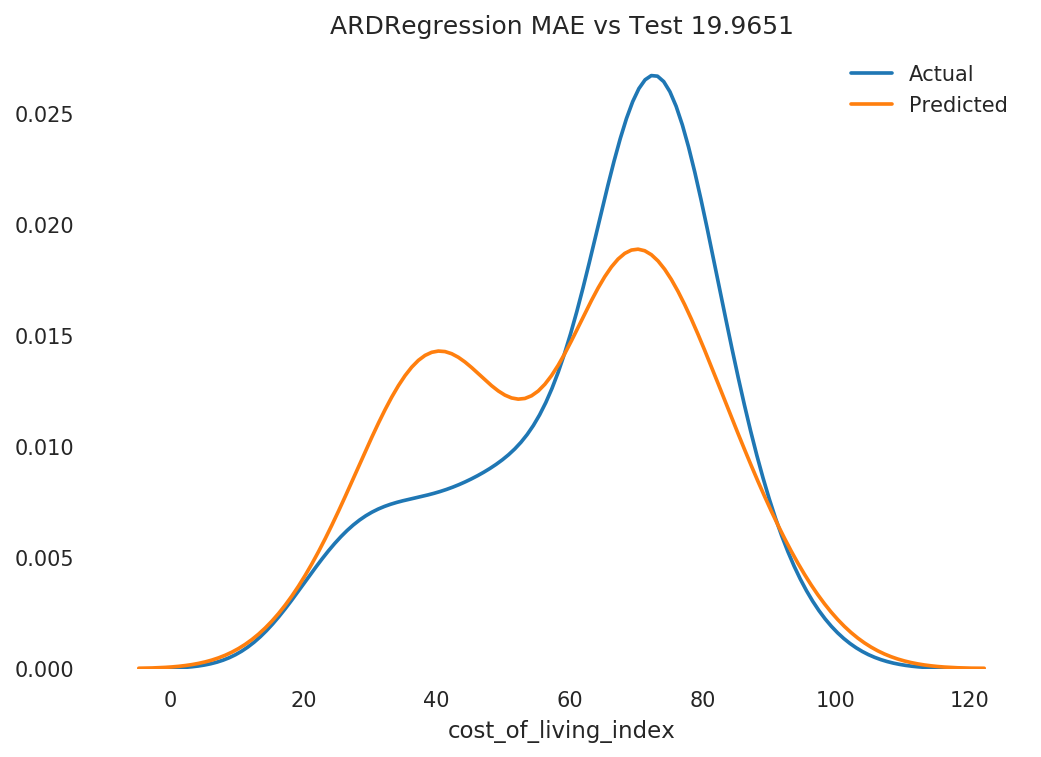

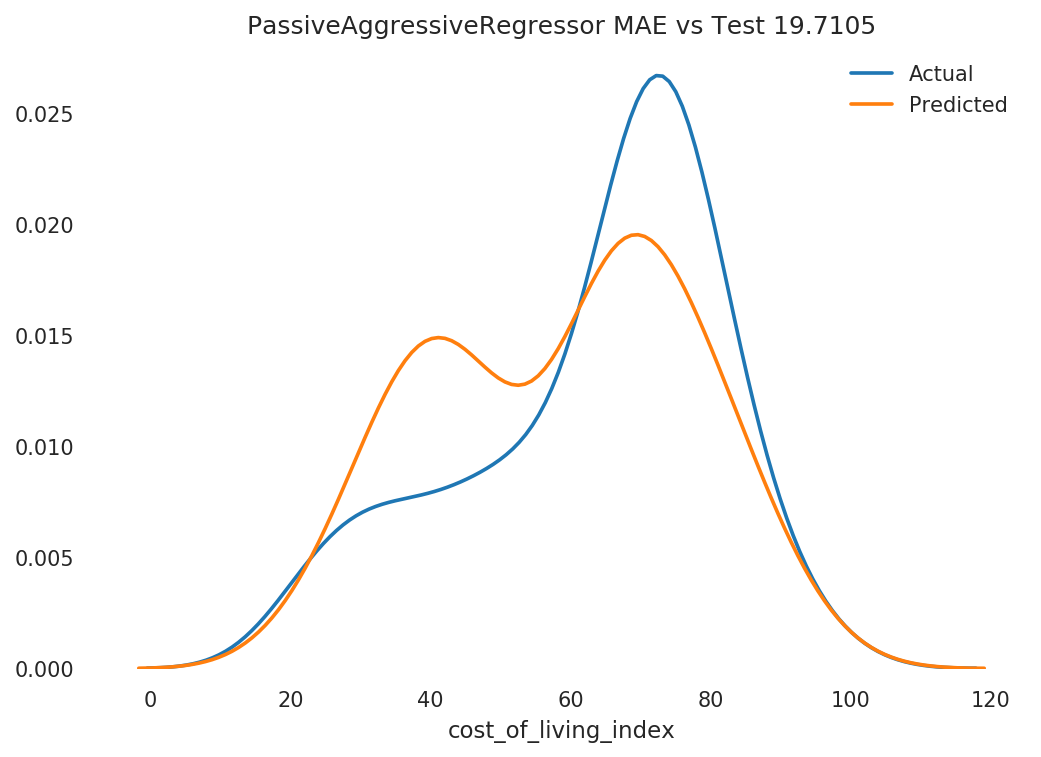

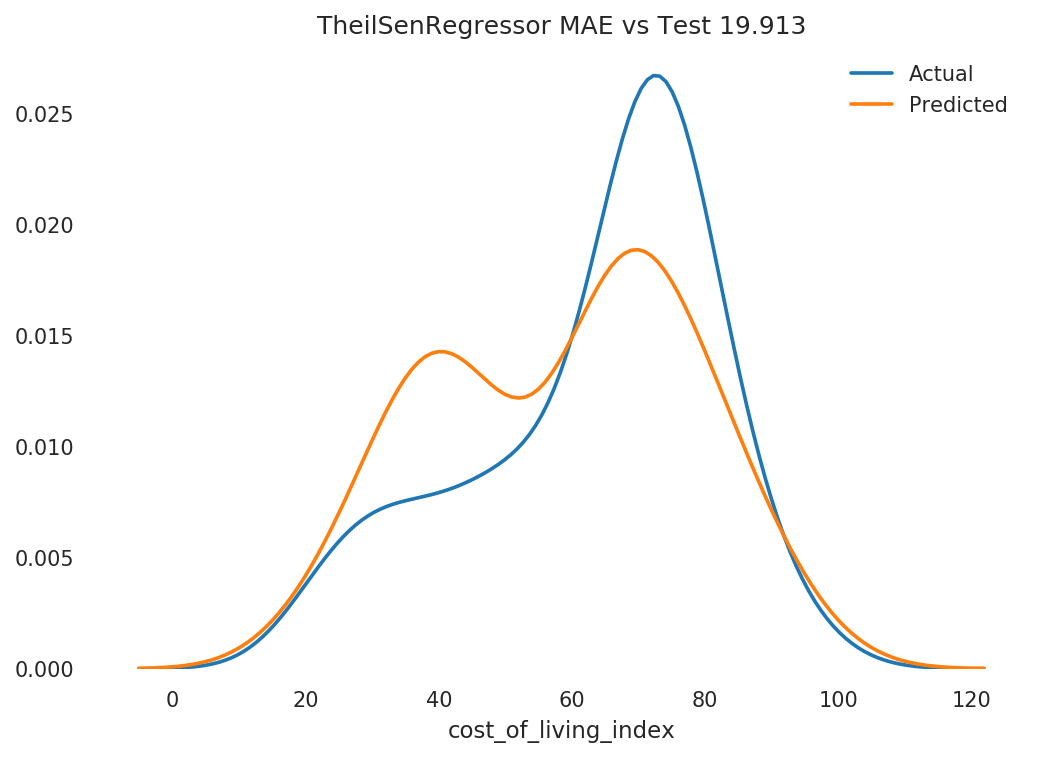

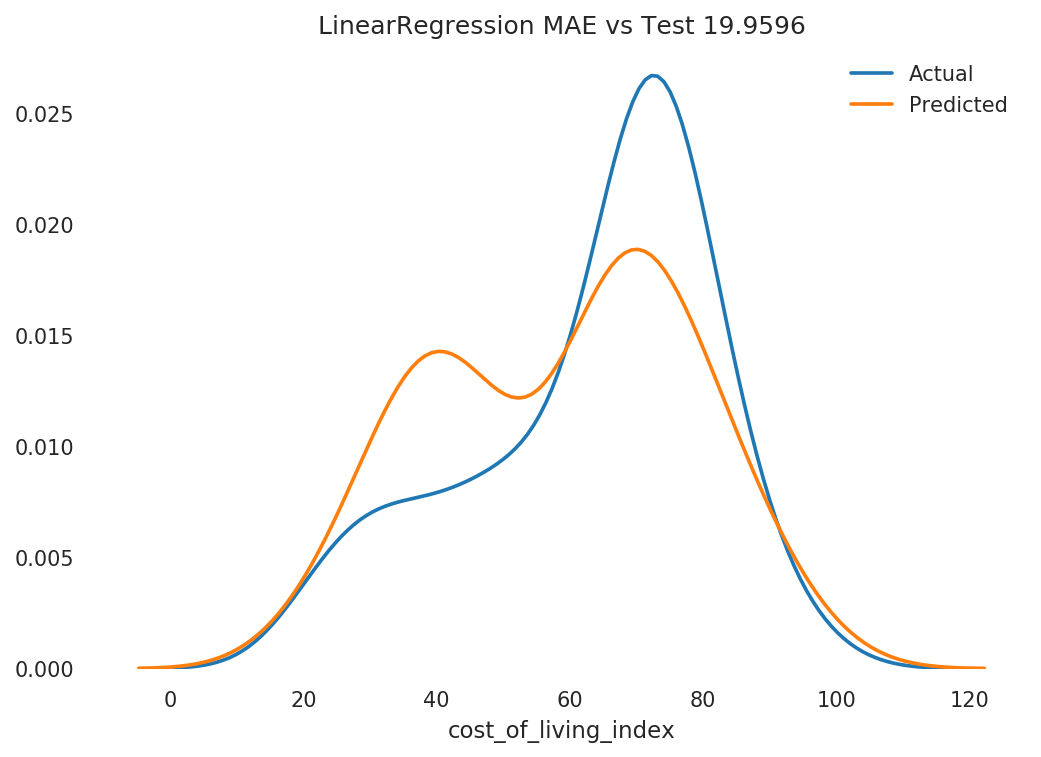

In [38]:
import numpy as np
from sklearn import linear_model
from sklearn import svm
# this is my test set
classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),    
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]



trainingData = X_train_scaled
trainingScores = y_train
predictionData = X_test_scaled

for item in classifiers:
    print(item, '-Classifer \n')
    
    clf = item
    clf.fit(trainingData, trainingScores)
    print(clf.predict(predictionData),'\n')


    y_pred = clf.predict(predictionData)
    mae = mean_absolute_error(y_val, y_pred) 
    print(f'MAE:  versus my test set{mae:,.4f} \n')

    # sns.regplot(x="total_bill", y="tip", data=tips);
    fig, ax = plt.subplots()
    sns.distplot(y_val, hist=False, kde=True, ax=ax, label='Actual')
    sns.distplot(y_pred, hist=False, kde=True, ax=ax, label='Predicted')

    title_string = str(item)
    mae_round = round(mae,4)
    mae_string = str(mae_round)
    sep = '('
    title_string = title_string.split(sep, 1)[0]
    title_acc = str(title_string + " MAE vs Test " + mae_string)
    ax.set_title(title_acc)
    # ax.legend().set_visible(False)

In [39]:
y_pred

array([42.4787064 , 65.71112188, 40.08383268, 80.25874491, 63.04629833,
       65.13509178, 71.1654379 , 69.25467449, 63.23802895, 29.85646709,
       70.96852993, 75.03713576, 87.83323749, 34.27683079, 58.77074808,
       46.57090423, 82.56706118, 22.15927432, 44.39439182, 45.43058831,
       71.97865115, 34.33374806, 36.4233902 , 79.26405265, 82.63342889,
       82.72116708, 37.92639467, 85.04308653, 51.09938791, 90.81045055,
       69.02870765, 69.95909382, 42.77489948, 66.84660603, 67.27101635,
       58.63295067, 41.92503471, 69.77018148, 75.63355016, 34.68204705,
       52.32645269, 66.90857078, 46.82049224, 68.59024897, 77.18475737,
       70.9203381 , 39.35153974, 67.07760197, 80.85248113, 26.56183156,
       43.35075479, 67.96078047, 95.35125217, 65.96846112, 36.16460677,
       23.86632467, 36.28632028, 37.55259717])

In [40]:
print('train', X_train_scaled.shape)
print('test',X_test_scaled.shape)
print('val',X_val_scaled.shape)
y_train.shape

train (460, 18)
test (58, 18)
val (58, 18)


(460,)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) -Classifer 

[29.06431726 79.91118636 68.65831629 76.79564387 36.87655005 64.21182255
 67.54165762 75.77449888 50.79821988 73.69206907 64.57519454 68.00826075
 45.44552833 77.42454017 74.67404433 76.56239192 76.04470091 69.76360024
 33.76119257 67.93965794 29.52156044 52.51090693 53.78058835 70.91061873
 67.64787557 29.88035596 50.5882352  35.63177585 72.34250478 70.00048311
 34.4967126  71.61975014 59.34029055 69.33585831 71.87260899 72.39726506
 73.07137692 72.81627111 46.48622596 56.66383118 62.58286431 75.32913552
 73.60864303 72.71058937 72.99709046 69.09142248 71.00692259 33.01406928
 74.09731201 46.4930577  80.77813843 78.59823093 74.63932152 62.77457928
 69.71473245 73.857232   64.78972637 42.23313792] 

MAE:  versus my validation set3.9134 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             

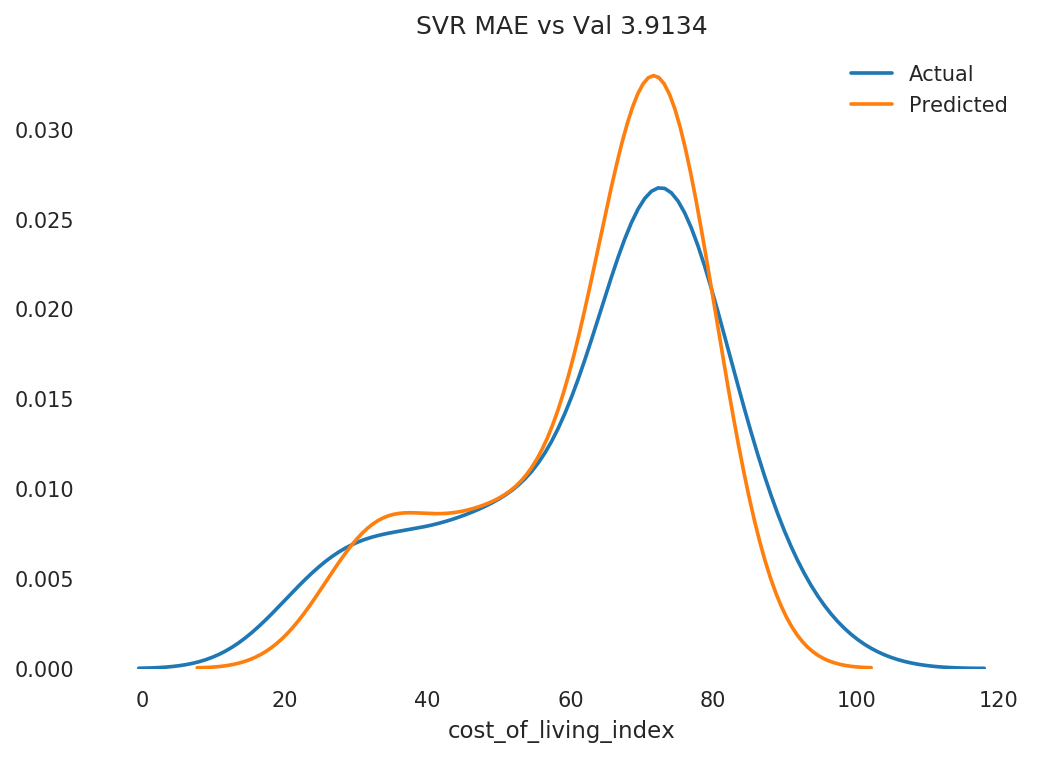

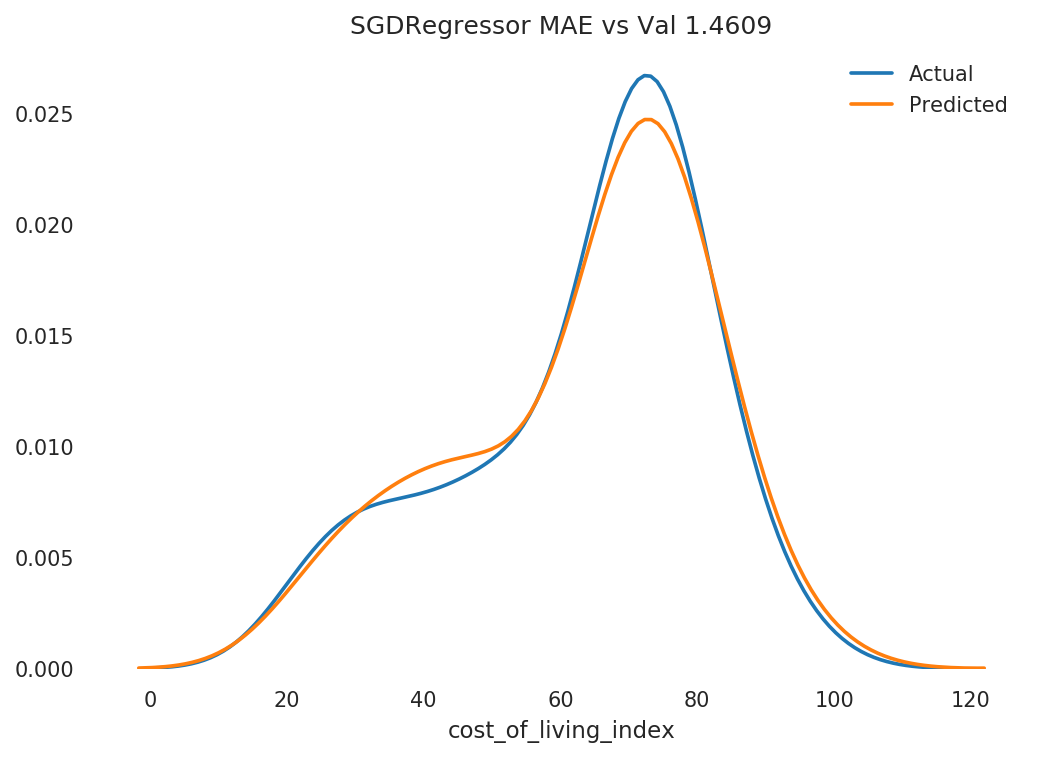

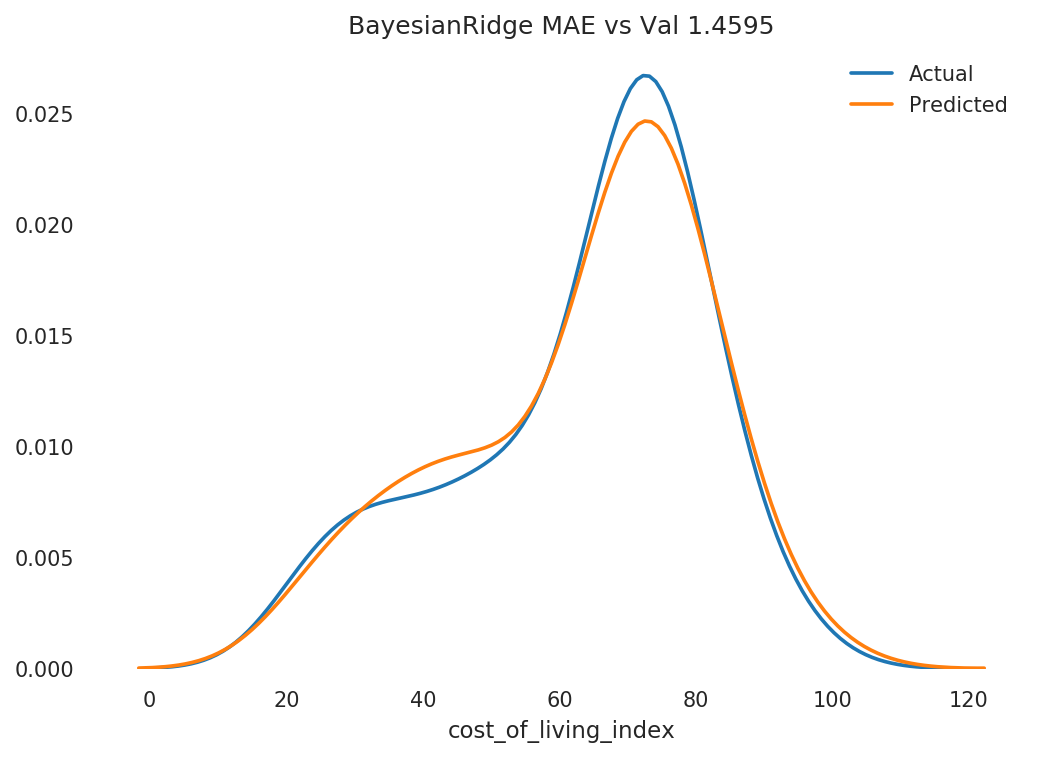

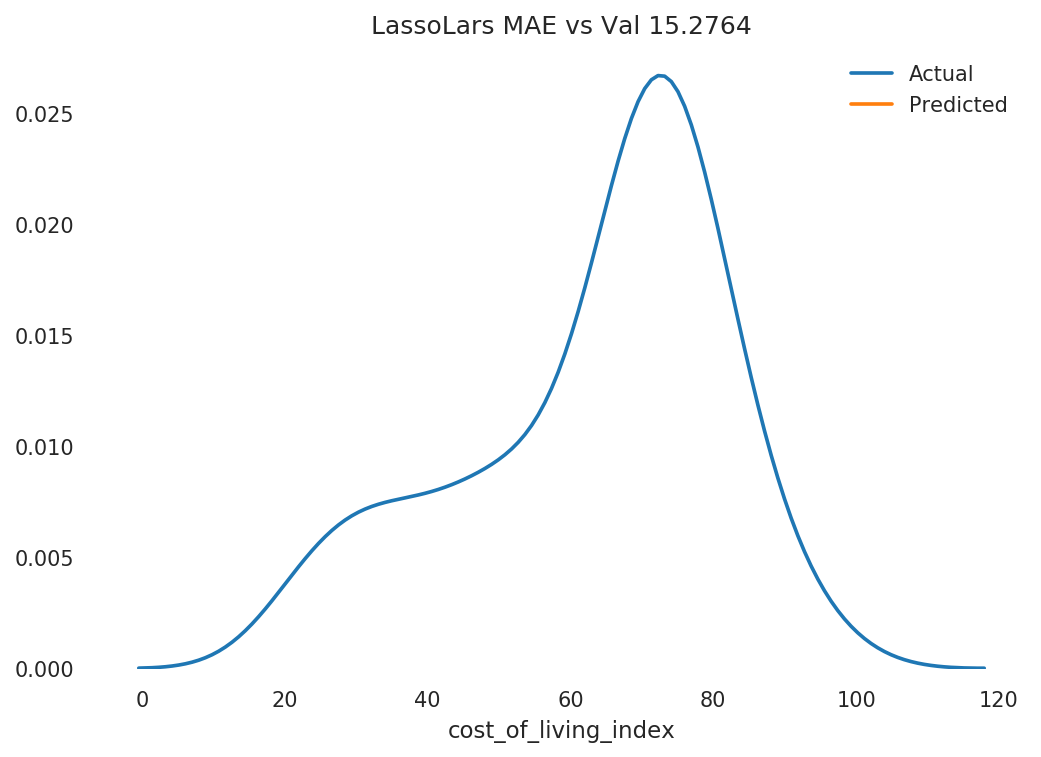

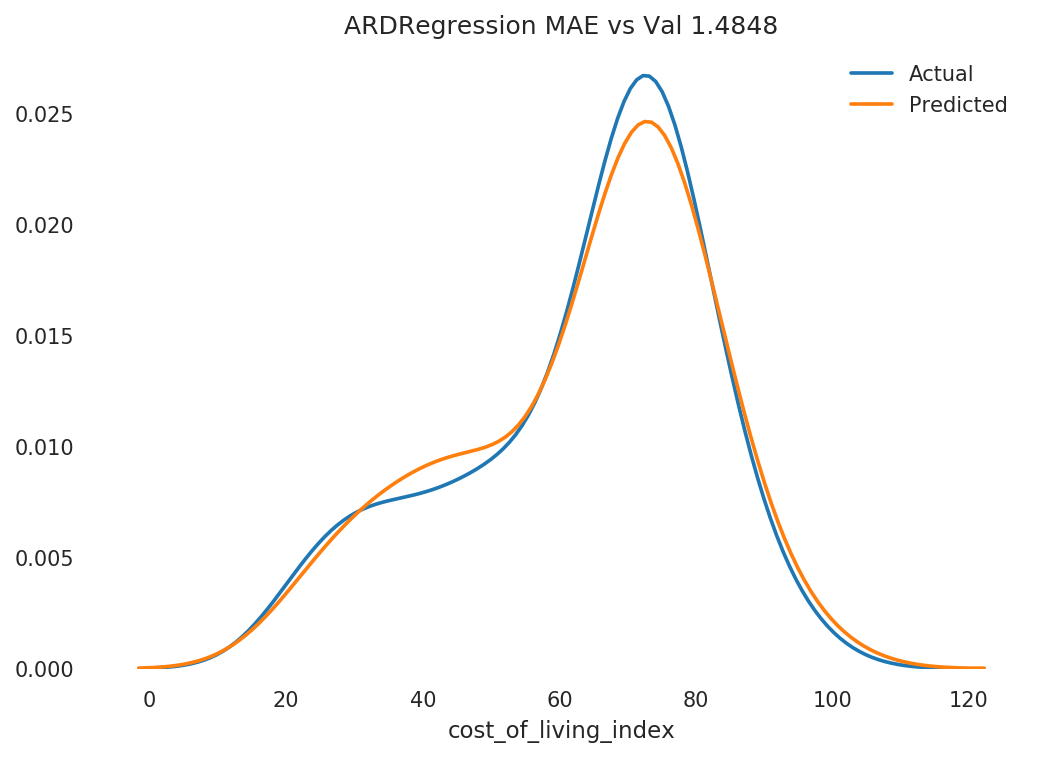

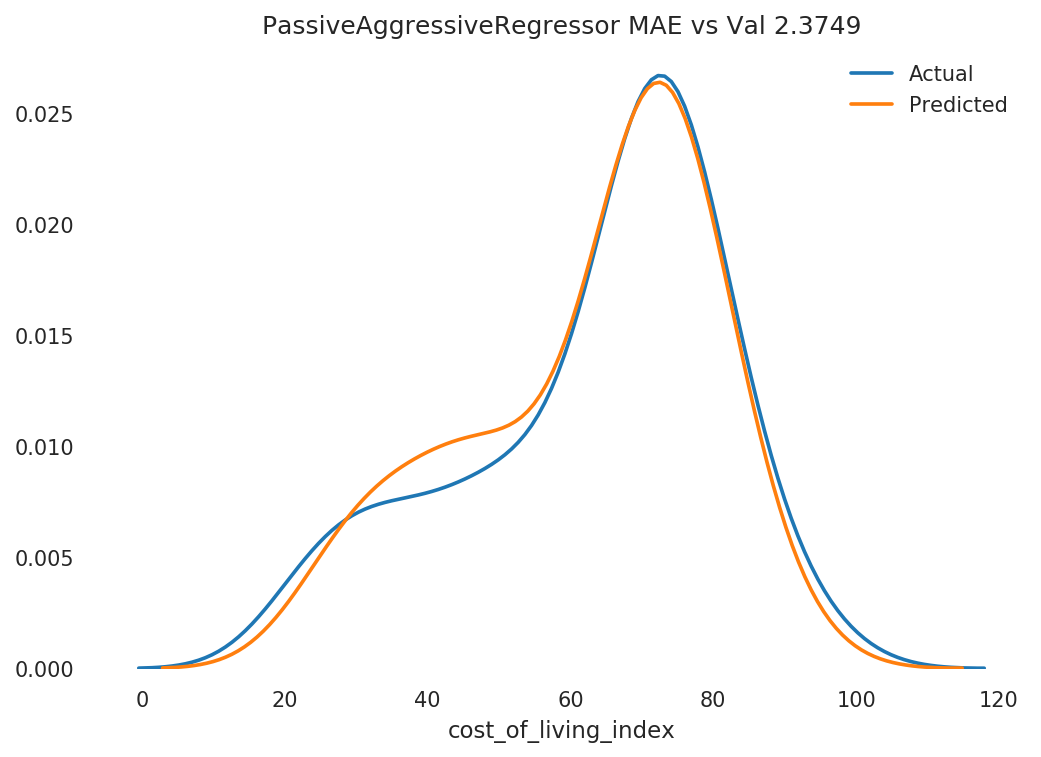

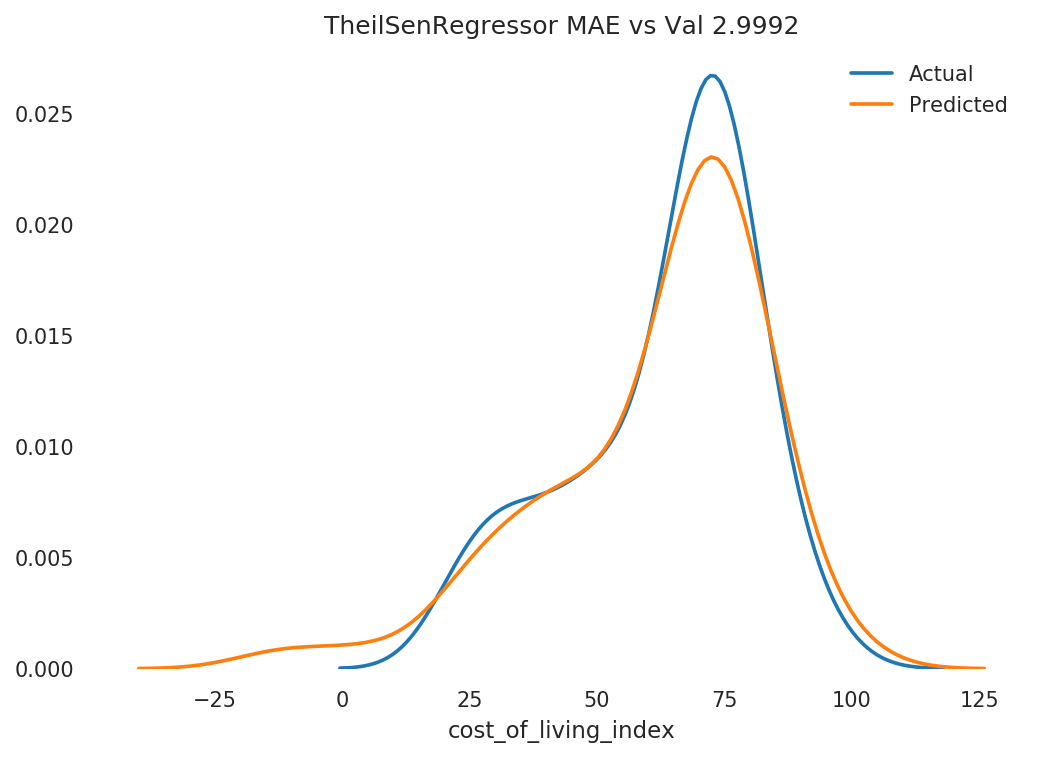

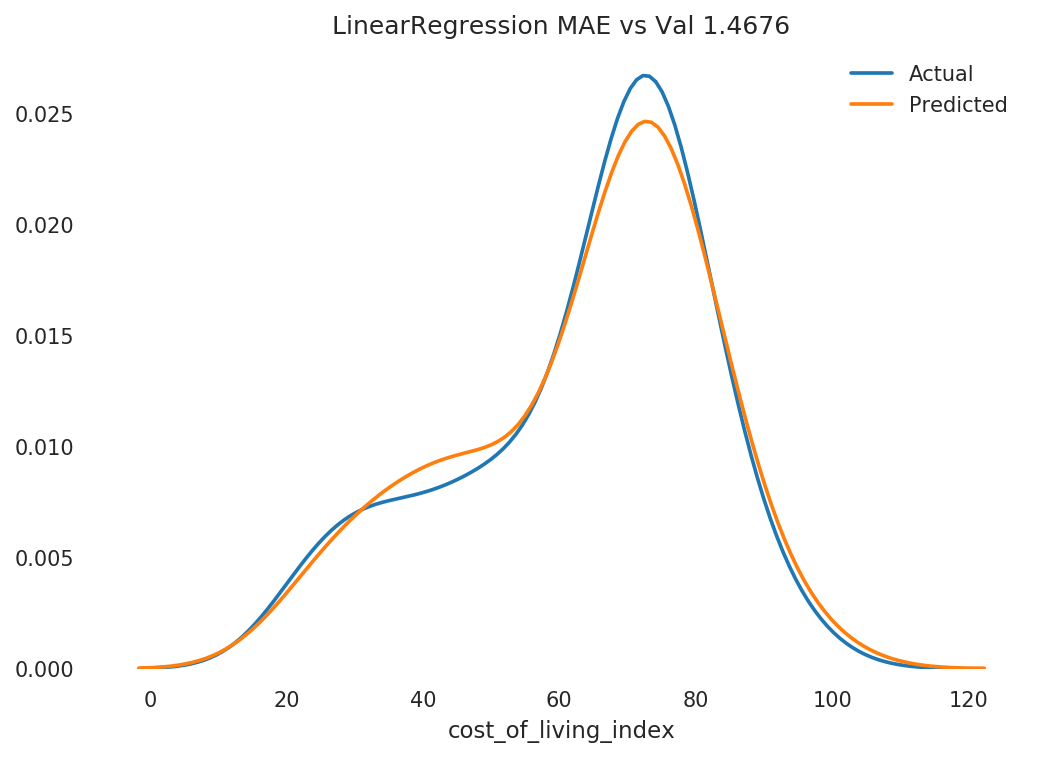

In [41]:
# All versus the validation set

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),    
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]



trainingData = X_train_scaled
trainingScores = y_train
predictionData = X_val_scaled

for item in classifiers:
    print(item, '-Classifer \n')
    
    clf = item
    clf.fit(trainingData, trainingScores)
    print(clf.predict(predictionData),'\n')


    y_pred = clf.predict(predictionData)
    mae = mean_absolute_error(y_val, y_pred) 
    print(f'MAE:  versus my validation set{mae:,.4f} \n')

    # sns.regplot(x="total_bill", y="tip", data=tips);
    fig, ax = plt.subplots()
    sns.distplot(y_val, hist=False, kde=True, ax=ax, label='Actual')
    sns.distplot(y_pred, hist=False, kde=True, ax=ax, label='Predicted')

    title_string = str(item)
    mae_round = round(mae,4)
    mae_string = str(mae_round)
    sep = '('
    title_string = title_string.split(sep, 1)[0]
    title_acc = str(title_string + " MAE vs Val " + mae_string)
    ax.set_title(title_acc)
    # ax.legend().set_visible(False)

# XGBoost versus val

In [0]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor

In [43]:
#Define X and Y 
#
y_log = np.log1p(y_train)


gpipeline = make_pipeline(
    StandardScaler(),
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

gpipeline.fit(X_train, y_log)
# print('Validation Accuracy:', pipeline.score(X_val, y_val))

[17:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=-1,
                              nthread=None, objective='reg:linear',
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
         verbose=False)

In [0]:
y_pred_log = gpipeline.predict(X_val)
y_pred = np.expm1(y_pred_log)

# print('Validation Accuracy', accuracy_score(y_val, y_pred))

In [45]:
mae = mean_absolute_error(y_val, y_pred)
print(f'MAE:  versus my validation set  {mae:,.4f} \n')

MAE:  versus my validation set  1.7920 



# XGBoost versus test

In [46]:
#Define X and Y 
#
y_log = np.log1p(y_train)


gpipeline = make_pipeline(
    StandardScaler(),
    XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
)

gpipeline.fit(X_train, y_log)

[17:41:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=None, n_estimators=100, n_jobs=-1,
                              nthread=None, objective='reg:linear',
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, seed=None, silent=None,
                              subsample=1, verbosity=1))],
         verbose=False)

In [0]:
y_pred_log = gpipeline.predict(X_test)
y_pred = np.expm1(y_pred_log)


In [48]:
mae = mean_absolute_error(y_val, y_pred)
print(f'MAE:  versus my test set  {mae:,.4f} \n')

MAE:  versus my test set  19.8587 

